# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored


In [2]:
pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning

pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00

pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

# Import the data

In [3]:
# We change the present directoory to the directory where the datafiles are stored

os.chdir('C:/Users/sadik/OneDrive/Desktop/Think Evolve')

df=pd.read_csv('application_data.csv')

df1=pd.read_csv('previous_application.csv')

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,NaN,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,NaN,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559,0.7296,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,-815.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,-19005,-3039,-9833.0000,-2437,NaN,1,1,0,1,0,0,Laborers,2.0000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.6504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,0.0000,2.0000,0.0000,-617.0000,0,1,0,0,0,0,

In [5]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,0.1828,0.8673,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,NaN,607500.0000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,NaN,112500.0000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,NaN,450000.0000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,NaN,337500.0000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# We first reset the index of both the files and combine them

In [6]:
df.reset_index(drop=True)

df1.reset_index(drop=True)

data=pd.concat([df,df1])

data.head()

print(data.shape)

(1977725, 151)


# Data Cleansing

## Find Null Values, NAN Values

In [7]:
print(data.isnull().sum())

SK_ID_CURR                         0
TARGET                       1670214
NAME_CONTRACT_TYPE                 0
CODE_GENDER                  1670214
FLAG_OWN_CAR                 1670214
                              ...   
DAYS_FIRST_DUE                980576
DAYS_LAST_DUE_1ST_VERSION     980576
DAYS_LAST_DUE                 980576
DAYS_TERMINATION              980576
NFLAG_INSURED_ON_APPROVAL     980576
Length: 151, dtype: int64


In [8]:
print(data.isna().sum())

SK_ID_CURR                         0
TARGET                       1670214
NAME_CONTRACT_TYPE                 0
CODE_GENDER                  1670214
FLAG_OWN_CAR                 1670214
                              ...   
DAYS_FIRST_DUE                980576
DAYS_LAST_DUE_1ST_VERSION     980576
DAYS_LAST_DUE                 980576
DAYS_TERMINATION              980576
NFLAG_INSURED_ON_APPROVAL     980576
Length: 151, dtype: int64


# We find that our df has 1977725 rows and 151 columns hence we remove those columns where the null values are greater than 30 percent

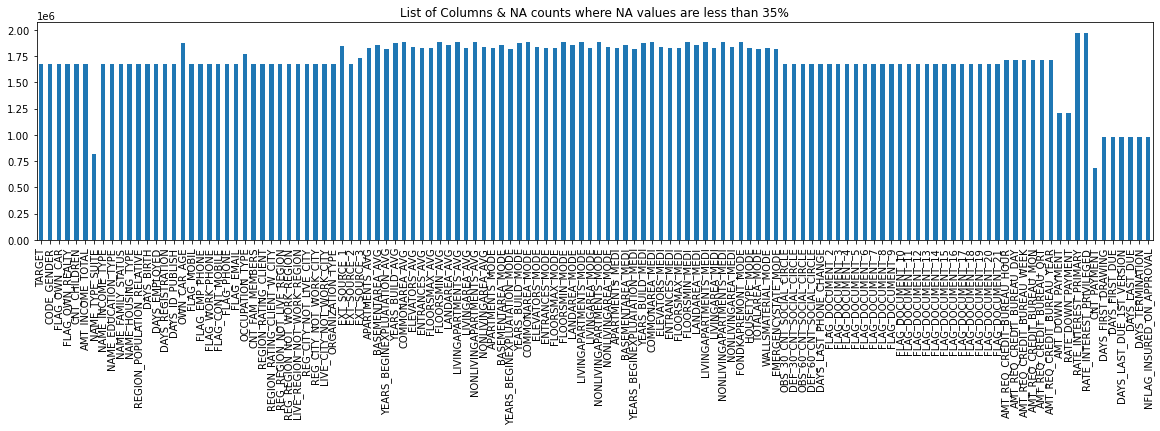

In [9]:
NA_col = data.isnull().sum()
NA_col = NA_col[NA_col.values >(0.30*len(data))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are less than 35%')
plt.show()

In [10]:
def removeNulls(dataframe, axis =1, percent=0.30):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [11]:
data = removeNulls(data, axis =1,percent = 0.30)


Number of Columns dropped	:  126

Old dataset rows,columns (1977725, 151) 
New dataset rows,columns (1977725, 25)


In [ ]:
data = removeNulls(data, axis =0,percent = 0.30)


In [ ]:
data.head()


# Remove Irrelevent columns from the data

In [ ]:
required_data=data[['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_SELLER_INDUSTRY']].copy()

In [ ]:
required_data.head()

In [ ]:
required_data.info()

# We convert all the numeric columns to continuous variables so as to find correlation between them

In [ ]:
num=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START']

required_data[num] = required_data[num].apply(pd.to_numeric)

# Derived Metrics

## Now we will derive some metrics of our own

In [ ]:
# We find goods price to credit ratio

required_data['goods_price_loan_ratio']=required_data['AMT_GOODS_PRICE']/required_data['AMT_CREDIT']

In [ ]:
# Create Slot For goods prices

bins = [0, 500000, 1000000, 1500000, 2000000, 2500000,4000000]

slot = ['0-500000', '500000-1000000', '1000000-1500000', '1500000-2000000', '2000000-2500000','2500000 and above']

required_data['AMT_Credit_Range'] = pd.cut(required_data['AMT_CREDIT'], bins, labels=slot)

required_data.head()

In [ ]:
# Create Slot For goods prices

bins = [0, 500000, 1000000, 1500000, 2000000, 2500000,4000000]

slot = ['0-500000', '500000-1000000', '1000000-1500000', '1500000-2000000', '2000000-2500000','2500000 and above']

required_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(required_data['AMT_GOODS_PRICE'], bins, labels=slot)

required_data.head()

In [ ]:
# Create Slot For amount annuity

bins = [0, 5000, 10000, 15000, 20000, 25000,40000]

slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']

required_data['AMT_ANNUITY_RANGE'] = pd.cut(required_data['AMT_ANNUITY'], bins, labels=slot)

required_data.head()

In [ ]:
# Perform Univariate Analysis

In [ ]:

def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

In [ ]:
univariate(df=required_data,col='AMT_CREDIT',vartype=0)


In [ ]:
univariate(df=required_data,col='AMT_ANNUITY',vartype=0)


As seen from above most of the loan amount annuity are distributed between 0 to 5 lacs

In [ ]:
univariate(df=required_data,col='AMT_GOODS_PRICE',vartype=0)


As seen from above most of the goods are priced between 0 to 5 lacs

In [ ]:
univariate(df=required_data,col='NAME_PORTFOLIO',vartype=1)


In [ ]:
univariate(df=required_data,col='NAME_GOODS_CATEGORY',vartype=1)


In [ ]:
hour =required_data.groupby(by= [required_data.HOUR_APPR_PROCESS_START])[['NAME_CASH_LOAN_PURPOSE']].count()
hour.rename(columns={"NAME_CASH_LOAN_PURPOSE": "count"},inplace=True)
ax =hour.plot(figsize=(20,8))
hour.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

In [ ]:
day =required_data.groupby(by= [required_data.WEEKDAY_APPR_PROCESS_START])[['NAME_CASH_LOAN_PURPOSE']].count()
day.rename(columns={"NAME_CASH_LOAN_PURPOSE": "count"},inplace=True)
ax =day.plot(figsize=(20,8))
day.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

# Bivariate Analysis


In [ ]:
correlation=required_data.corr()
correlation

In [ ]:
# We Plot heatmap to see correlation between differenct variables

f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,annot= True)
plt.show()